# Model for CAT & DOG Classification 

Data Prepration

In [0]:
import os, shutil

#Store Dataset source in variable...
original_dataset_cat = '/content/drive/My Drive/Colab Notebooks/Cat&Dog-Dataset/All Images/Cat'
original_dataset_dog = '/content/drive/My Drive/Colab Notebooks/Cat&Dog-Dataset/All Images/Dog'

#Creating Base Directory
base_dir = '/content/drive/My Drive/Colab Notebooks/Cat&Dog-Dataset/Assignment'
#os.mkdir(base_dir)

#Creating Sub-Directories in Base Directory
train_dir = os.path.join(base_dir, 'train')
#os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
#os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
#os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
#os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
#os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
#os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
#os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
#os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
#os.mkdir(test_dogs_dir)

In [2]:
#Store Cats & Dogs Images in Ralevant Directory
#For CATS:
.....
fnames = ['{}.jpg'.format(i) for i in range(500, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_cat, fname)
  dst = os.path.join(train_cats_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_cat, fname)
  dst = os.path.join(validation_cats_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['{}.jpg'.format(i) for i in range(2000, 2500)]
for fname in fnames:
  src = os.path.join(original_dataset_cat, fname)
  dst = os.path.join(test_cats_dir, fname)
  shutil.copyfile(src, dst)

#For DOGS:
fnames = ['{}.jpg'.format(i) for i in range(500, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dog, fname)
  dst = os.path.join(train_dogs_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dog, fname)
  dst = os.path.join(validation_dogs_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['{}.jpg'.format(i) for i in range(2000, 2500)]
for fname in fnames:
  src = os.path.join(original_dataset_dog, fname)
  dst = os.path.join(test_dogs_dir, fname)
  shutil.copyfile(src, dst)
.....

SyntaxError: ignored

In [6]:
#Checking Length of Each Dir...
print('total training cat images:', len(os.listdir(train_cats_dir)))

print('total training dog images:', len(os.listdir(train_dogs_dir)))

print('total validation cat images:', len(os.listdir(validation_cats_dir)))

print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

print('total test cat images:', len(os.listdir(test_cats_dir)))

print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [3]:
#Building a network...
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

In [0]:
#Configuring the model for training

from keras import optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [5]:
#Processing the Data Using ImageDataGen...
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
target_size=(150, 150), batch_size=20, class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
validation_dir,target_size=(150, 150), batch_size=20,class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
#For Checking Preprocesed Data Dims...
for data_batch, labels_batch in train_generator:
  print('data batch shape:', data_batch.shape)
  print('labels batch shape:', labels_batch.shape)
  break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [8]:
#Fit_generator the model using a batch generator
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=30,
validation_data=validation_generator,
validation_steps=50)

Epoch 1/30
100/100 [==============================] - 1136s 11s/step - loss: 0.6905 - acc: 0.5260 - val_loss: 0.6528 - val_acc: 0.5060
Epoch 2/30
100/100 [==============================] - 106s 1s/step - loss: 0.6661 - acc: 0.5945 - val_loss: 0.6550 - val_acc: 0.6040
Epoch 3/30
100/100 [==============================] - 106s 1s/step - loss: 0.6339 - acc: 0.6415 - val_loss: 0.6295 - val_acc: 0.5960
Epoch 4/30
100/100 [==============================] - 110s 1s/step - loss: 0.6014 - acc: 0.6845 - val_loss: 0.4901 - val_acc: 0.6850
Epoch 5/30
100/100 [==============================] - 105s 1s/step - loss: 0.5690 - acc: 0.7115 - val_loss: 0.5801 - val_acc: 0.6840
Epoch 6/30
100/100 [==============================] - 105s 1s/step - loss: 0.5297 - acc: 0.7420 - val_loss: 0.5066 - val_acc: 0.6970
Epoch 7/30
100/100 [==============================] - 105s 1s/step - loss: 0.5061 - acc: 0.7495 - val_loss: 0.5575 - val_acc: 0.6990
Epoch 8/30
100/100 [==============================] - 106s 1s/step 

In [0]:
#Saving the model for later use...
model.save('/content/drive/My Drive/Colab Notebooks/Cat&Dog-Dataset/Assignment/cats_and_dogs_simple_1.h5')

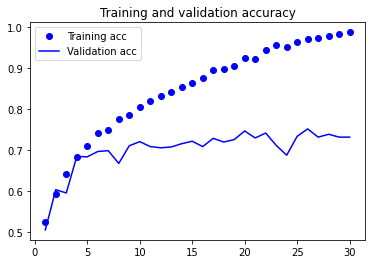

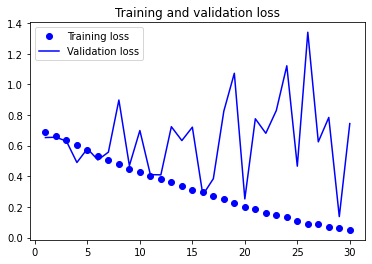

In [10]:
#Lets See loss and accuracy during training...
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
#Setting up a Data Augmentation configuration...
datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2,
height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True,
fill_mode='nearest')

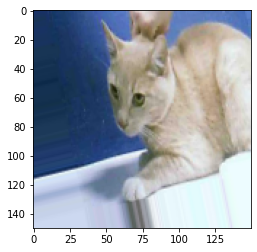

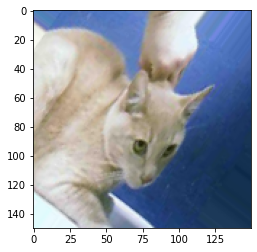

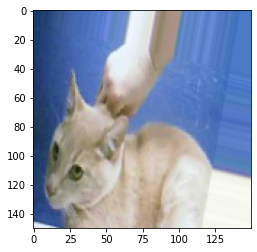

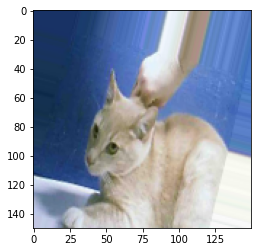

In [15]:
from keras.preprocessing import image
fnames = [os.path.join(train_cats_dir, fname) 
for fname in os.listdir(train_cats_dir)]
img_path = fnames[10]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i=0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i+=1
  if i % 4 == 0:
    break
plt.show()



In [0]:
#
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])